In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy
style.use('seaborn-dark')

import warnings
warnings.filterwarnings("ignore")

In [3]:
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 

Since some simulations/experiments took longer to compute, we cached some of the results and plot the rest of figures accordingly.

## Simulation Pairwise Alignment Results

In [5]:
f1 = "../cachedResults/simData/pseudocounts/breast_layer1_avg"
f2 = "../cachedResults/simData/pseudocounts/breast_layer2_avg"
f3 = "../cachedResults/simData/pseudocounts/breast_layer3_avg"
f4 = "../cachedResults/simData/pseudocounts/breast_layer4_avg"
s1 = "../cachedResults/simData/pseudocounts/layer1_scanorama"
s2 = "../cachedResults/simData/pseudocounts/layer2_scanorama"
s3 = "../cachedResults/simData/pseudocounts/layer3_scanorama"
s4 = "../cachedResults/simData/pseudocounts/layer4_scanorama"

In [6]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df3 = pd.read_csv(f3, index_col=0)
df4 = pd.read_csv(f4, index_col=0)

scanorama1 = pd.read_csv(s1, index_col=0).to_numpy().flatten()
scanorama2 = pd.read_csv(s2, index_col=0).to_numpy().flatten()
scanorama3 = pd.read_csv(s3, index_col=0).to_numpy().flatten()
scanorama4 = pd.read_csv(s4, index_col=0).to_numpy().flatten()

factor = list(range(11))
pseudocounts = np.arange(0.5, 5, 0.5).tolist()
mixed1 = df1.loc['mixed']
spatial1 = df1.loc['spatial']
baseline1 = df1.loc['baseline']

mixed2 = df2.loc['mixed']
spatial2 = df2.loc['spatial']
baseline2 = df2.loc['baseline']

mixed3 = df3.loc['mixed']
spatial3 = df3.loc['spatial']
baseline3 = df3.loc['baseline']

mixed4 = df4.loc['mixed']
spatial4 = df4.loc['spatial']
baseline4 = df4.loc['baseline']

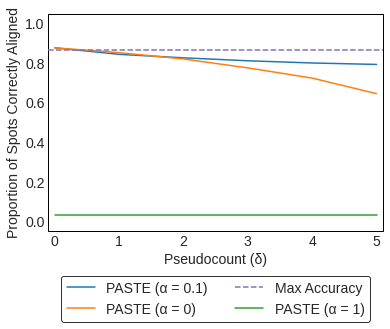

In [14]:
x = np.arange(0, 6, 1).tolist()
m = 10*[mixed2[0]]


ax = sns.lineplot(x, mixed2[0:6], label = "PASTE (α = 0.1)")
ax = sns.lineplot(x, baseline2[0:6], label = "PASTE (α = 0)")
ax = sns.lineplot(x, spatial2[0:6], label = "PASTE (α = 1)")
ax.axhline(mixed1[0], linestyle='--', label = 'Max Accuracy', c = '#8172b2')


ax.set(xlim=(-0.1,5.1), ylim=(-0.05,1.05))
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')  
ax.set_xlabel('Pseudocount (δ)', fontsize = 14)
ax.set_ylabel('Proportion of Spots Correctly Aligned', fontsize = 14)
h, l = ax.get_legend_handles_labels()
handles = [h[0],h[1],h[3],h[2]] 
labels = [l[0],l[1],l[3],l[2]] 
ax.legend(handles, labels, loc= 'lower center', bbox_to_anchor=(0.5, -0.45), ncol=2, frameon=True, edgecolor='black', facecolor='white', fontsize = 14)
ticks = plt.xticks(np.arange(min(x), max(x)+1, 1.0))

In [19]:
filenames = ['baseline.csv','mixed_0.01.csv','mixed_0.1.csv',
             'mixed_0.2.csv','mixed_0.5.csv','mixed_0.9.csv','spatial.csv', 'scanorama.csv']
keys = [0, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 'scanorama']

mean = {}
sd = {}
for i in range(len(filenames)):
    mean[keys[i]] = []
    sd[keys[i]] = []   


for s in ['slice1', 'slice2', 'slice3', 'slice4']:
    for i in range(len(filenames)):
        path = './results/pairwise_sim/' + s + '/' + filenames[i]
        mean[keys[i]].append(pd.read_csv(path, index_col= 0).mean())
        sd[keys[i]].append(pd.read_csv(path, index_col= 0).std())

['Max Accuracy', 'α = 0.1 (Mixed)', 'α = 0 (Gene Exp Only)', 'α = 1 (Spatial Only)', 'Scanorama + OT', 'α = 0.01 (Mixed)', 'α = 0.2 (Mixed)', 'α = 0.5 (Mixed)', 'α = 0.9 (Mixed)']


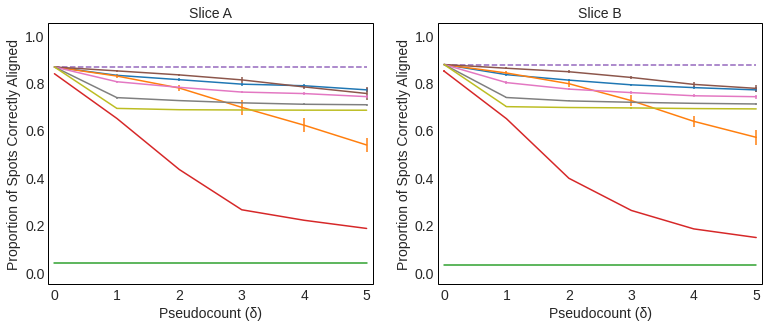

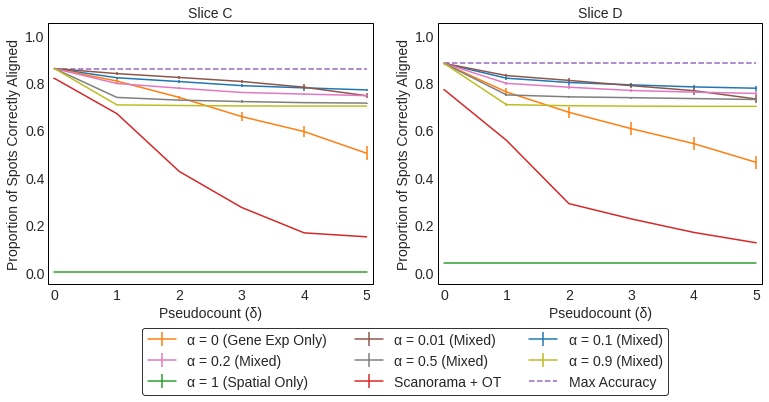

In [20]:
factor = list(range(11))

f, ax = plt.subplots(1,2, figsize=(12.8, 4.8))
f1, ax1 = plt.subplots(1,2, figsize=(12.8, 4.8))
# Setting the values for all axes.
plt.setp(ax, xlim=(-0.1,5.1), ylim=(-0.05,1.05))
x = np.arange(0, 6, 1).tolist()

title = dict(zip(range(4), ['A', 'B', 'C', 'D']))

for a, i in zip([ax[0], ax[1], ax1[0], ax1[1]], range(4)):
    a.errorbar(x, mean[0.1][i][0:6], yerr = sd[0.1][i][0:6], label = "α = 0.1 (Mixed)")
    a.errorbar(x, mean[0][i][0:6], yerr = sd[0][i][0:6], label= "α = 0 (Gene Exp Only)")
    a.errorbar(x, mean[1][i][0:6], yerr = sd[1][i][0:6], label = "α = 1 (Spatial Only)")
    a.errorbar(x, mean['scanorama'][i][0:6], yerr = sd['scanorama'][i][0:6], label = "Scanorama + OT")

    m1 = 6*[mean[0.1][i][0]]
    a.plot(factor[0:6], m1, '--', label = "Max Accuracy")

    a.errorbar(x, mean[0.01][i][0:6], yerr = sd[0.01][i][0:6], label = "α = 0.01 (Mixed)")
    a.errorbar(x, mean[0.2][i][0:6], yerr = sd[0.2][i][0:6], label = "α = 0.2 (Mixed)")
    a.errorbar(x, mean[0.5][i][0:6], yerr = sd[0.5][i][0:6], label = "α = 0.5 (Mixed)")
    a.errorbar(x, mean[0.9][i][0:6], yerr = sd[0.9][i][0:6], label = "α = 0.9 (Mixed)")
    a.set_title('Slice ' + title[i], fontsize = 14)

for i in range(2):
    ax[i].set(xlim=(-0.1,5.1), ylim=(-0.05,1.05))
    ax[i].set_facecolor('white')
    ax[i].patch.set_edgecolor('black')
    ax[i].patch.set_linewidth('1')  
    ax[i].set_xlabel('Pseudocount (δ)', fontsize = 14)
    ax[i].set_ylabel('Proportion of Spots Correctly Aligned', fontsize = 14)
    ax[i].set_xticks(np.arange(min(x), max(x)+1, 1.0))
    
    ax1[i].set(xlim=(-0.1,5.1), ylim=(-0.05,1.05))
    ax1[i].set_facecolor('white')
    ax1[i].patch.set_edgecolor('black')
    ax1[i].patch.set_linewidth('1')  
    ax1[i].set_xlabel('Pseudocount (δ)', fontsize = 14)
    ax1[i].set_ylabel('Proportion of Spots Correctly Aligned', fontsize = 14)
    ax1[i].set_xticks(np.arange(min(x), max(x)+1, 1.0))

h, l = ax1[1].get_legend_handles_labels()
handles = [h[2], h[6], h[3], h[5], h[7], h[4], h[1], h[8], h[0]] 
labels = [l[2], l[6], l[3], l[5], l[7], l[4], l[1], l[8], l[0]] 
print(l)
ax1[1].legend(handles, labels, loc = 'lower center', bbox_to_anchor=(-0.1, -0.45), frameon=True, edgecolor='black', facecolor='white', ncol=3, fontsize=14)
plt.show()

## Simulation Center Alignment Figures

In [82]:
a1 = pd.read_csv("../cachedResults/multilayer_sim/pseudocount/layer1_sim_center_low_rank_initial", index_col= 0)
a2 = pd.read_csv("../cachedResults/multilayer_sim/pseudocount/layer2_sim_center_low_rank_initial", index_col= 0)
a3 = pd.read_csv("../cachedResults/multilayer_sim/pseudocount/layer3_sim_center_low_rank_initial", index_col= 0)
a4 = pd.read_csv("../cachedResults/multilayer_sim/pseudocount/layer4_sim_center_low_rank_initial", index_col= 0)

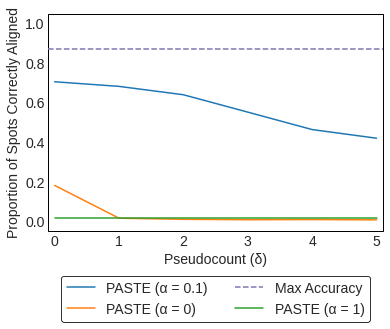

In [83]:
x = [0,1,2,3,4,5]
ax = sns.lineplot(x, a2.iloc[1], label = "PASTE (α = 0.1)")
ax = sns.lineplot(x, a2.iloc[0], label = "PASTE (α = 0)")
ax = sns.lineplot(x, a2.iloc[2], label = "PASTE (α = 1)")
ax.axhline(0.86852, linestyle='--', label = 'Max Accuracy', c = '#8172b2')
ax.set(xlim=(-0.1,5.1), ylim=(-0.05,1.05))
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')  
ax.set_xlabel('Pseudocount (δ)', fontsize = 14)
ax.set_ylabel('Proportion of Spots Correctly Aligned', fontsize = 14)
h, l = ax.get_legend_handles_labels()
handles = [h[0],h[1],h[3],h[2]] 
labels = [l[0],l[1],l[3],l[2]] 
g = ax.legend(handles, labels, loc= 'lower center', bbox_to_anchor=(0.5, -0.45), ncol=2, frameon=True, edgecolor='black', facecolor='white', fontsize=14)

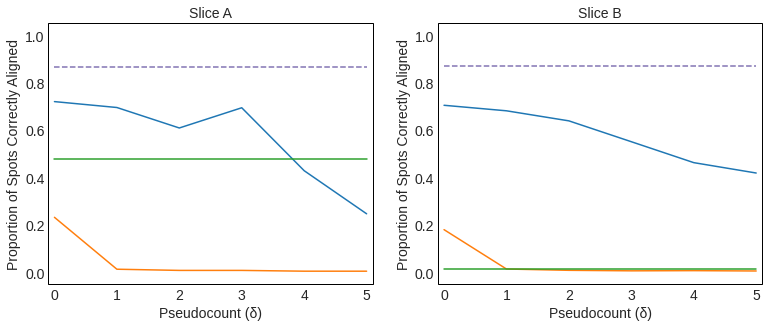

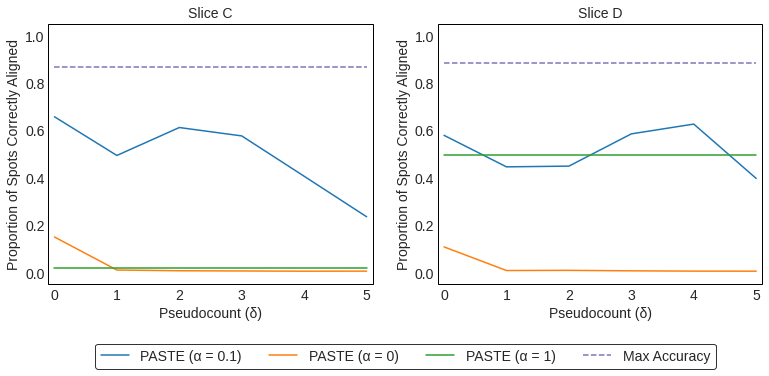

In [84]:
f, ax = plt.subplots(1,2, figsize=(12.8, 4.8))
plt.setp(ax, xlim=(-0.1,5.1), ylim=(-0.05,1.05))

ax[0].plot(x, a1.iloc[1], label = "α = 0.1 (Mixed)")
ax[0].plot(x, a1.iloc[0], label= "α = 0 (Gene Exp Only)")
ax[0].plot(x, a1.iloc[2], label = "α = 1 (Spatial Only)")
m1 = len(x)*[0.8661417322834645]
ax[0].plot(x, m1, '--', label = "Max Accuracy",  c = '#8172b2')
ax[0].set_title('Slice A', fontsize = 14)

ax[1].plot(x, a2.iloc[1], label = "α = 0.1 (Mixed)")
ax[1].plot(x, a2.iloc[0], label= "α = 0 (Gene Exp Only)")
ax[1].plot(x, a2.iloc[2], label = "α = 1 (Spatial Only)")
m2 = len(x)*[0.86852]
ax[1].plot(x, m2, '--', label = "Max Accuracy",  c = '#8172b2')
ax[1].set_title('Slice B', fontsize = 14)

f1, ax1 = plt.subplots(1,2, figsize=(12.8, 4.8))

ax1[0].plot(x, a3.iloc[1], label = "α = 0.1 (Mixed)")
ax1[0].plot(x, a3.iloc[0], label= "α = 0 (Gene Exp Only)")
ax1[0].plot(x, a3.iloc[2], label = "α = 1 (Spatial Only)")
m3 = len(x)*[0.8674242424242423]
ax1[0].plot(x, m3, '--', label = "Max Accuracy",  c = '#8172b2')
ax1[0].set_title('Slice C', fontsize = 14)


ax1[1].plot(x, a4.iloc[1], label = "PASTE (α = 0.1)")
ax1[1].plot(x, a4.iloc[0], label= "PASTE (α = 0)")
ax1[1].plot(x, a4.iloc[2], label = "PASTE (α = 1)")
m4 = len(x)*[0.8816793893129771]
ax1[1].plot(x, m4, '--', label = "Max Accuracy",  c = '#8172b2')
ax1[1].set_title('Slice D', fontsize = 14)

for i in range(2):
    ax[i].set(xlim=(-0.1,5.1), ylim=(-0.05,1.05))
    ax[i].set_facecolor('white')
    ax[i].patch.set_edgecolor('black')
    ax[i].patch.set_linewidth('1')  
    ax[i].set_xlabel('Pseudocount (δ)', fontsize = 14)
    ax[i].set_ylabel('Proportion of Spots Correctly Aligned', fontsize = 14)
    
    ax1[i].set(xlim=(-0.1,5.1), ylim=(-0.05,1.05))
    ax1[i].set_facecolor('white')
    ax1[i].patch.set_edgecolor('black')
    ax1[i].patch.set_linewidth('1')  
    ax1[i].set_xlabel('Pseudocount (δ)', fontsize = 14)
    ax1[i].set_ylabel('Proportion of Spots Correctly Aligned', fontsize = 14)

ax1[1].legend(loc = 'lower center', bbox_to_anchor=(-0.1, -0.35), frameon=True, edgecolor='black', facecolor='white', ncol=4, fontsize=14)
plt.show()

In [59]:
c1 = pd.read_csv("../cachedResults/simData/center_kl/layer1_low_rank_initial.csv", index_col= 0)
c2 = pd.read_csv("../cachedResults/simData/center_kl/layer2_low_rank_initial.csv", index_col= 0)
c3 = pd.read_csv("../cachedResults/simData/center_kl/layer3_low_rank_initial.csv", index_col= 0)
c4 = pd.read_csv("../cachedResults/simData/center_kl/layer4_low_rank_initial.csv", index_col= 0)

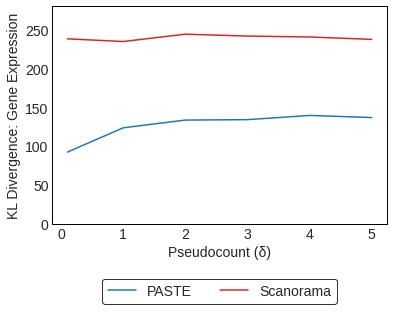

In [80]:
x = c2.index
ax = sns.lineplot(x, c2['paste'], label = "PASTE")
ax = sns.lineplot(x, c2['scanorama'], label = "Scanorama", color = '#d62728')
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')  
ax.set_title("", fontsize = 14)
ax.set_xlabel('Pseudocount (δ)', fontsize = 14)
ax.set_ylabel('KL Divergence: Gene Expression', fontsize = 14)
ax.legend(loc= 'lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, frameon=True, edgecolor='black', facecolor='white', fontsize=14)
ax.set(ylim = (0, 280))
plt.savefig('./center_vs_scanorama_sliceB.pdf',  dpi = 300, bbox_inches = "tight")

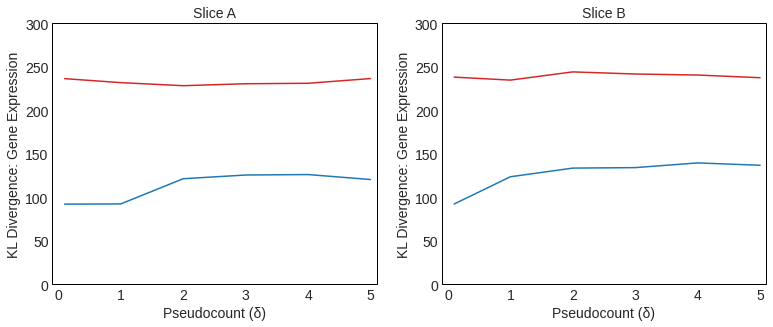

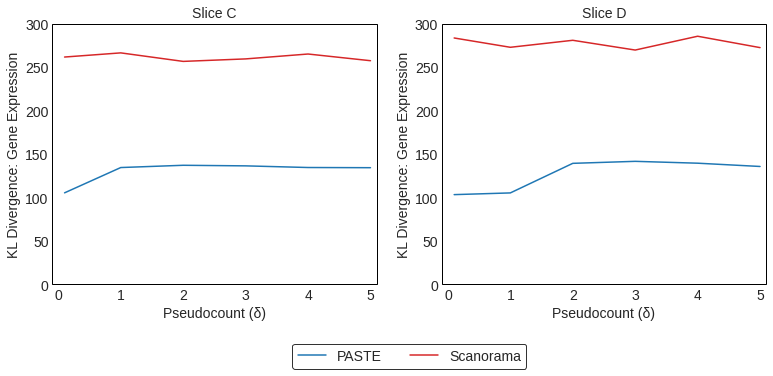

In [81]:
f, ax = plt.subplots(1,2, figsize=(12.8,4.8))
# Setting the values for all axes.

ax[0].plot(c1.index, c1['paste'], label = "PASTE")
ax[0].plot(c1.index, c1['scanorama'], label = "Scanorama", c = '#d62728')
ax[0].set_title('Slice A', fontsize=14)

ax[1].plot(c1.index, c2['paste'], label = "PASTE")
ax[1].plot(c1.index, c2['scanorama'], label = "Scanorama", c = '#d62728')
ax[1].set_title('Slice B', fontsize=14)

f1, ax1 = plt.subplots(1,2, figsize=(12.8,4.8))
ax1[0].plot(c1.index, c3['paste'], label = "PASTE")
ax1[0].plot(c1.index, c3['scanorama'], label = "Scanorama", c = '#d62728')
ax1[0].set_title('Slice C', fontsize=14)

ax1[1].plot(c1.index, c4['paste'], label = "PASTE")
ax1[1].plot(c1.index, c4['scanorama'], label = "Scanorama", c = '#d62728')
ax1[1].set_title('Slice D', fontsize=14)

for i in range(2):
    ax[i].set_facecolor('white')
    ax[i].patch.set_edgecolor('black')
    ax[i].patch.set_linewidth('1')  
    ax[i].set_xlabel('Pseudocount (δ)', fontsize = 14)
    ax[i].set_ylabel('KL Divergence: Gene Expression', fontsize = 14)
    ax[i].set(xlim=(-0.1,5.1), ylim = (0, 300))

    
    ax1[i].set(xlim=(-0.1, 5.1), ylim = (0,300))
    ax1[i].set_facecolor('white')
    ax1[i].patch.set_edgecolor('black')
    ax1[i].patch.set_linewidth('1')  
    ax1[i].set_xlabel('Pseudocount (δ)', fontsize = 14)
    ax1[i].set_ylabel('KL Divergence: Gene Expression', fontsize = 14)


handles, labels = ax[1].get_legend_handles_labels()
ax1[1].legend(handles, labels, loc = 'lower center', bbox_to_anchor=(-0.1, -0.35), frameon=True, edgecolor='black', facecolor='white', ncol=4, fontsize=14)
plt.show()
# f.savefig('center_vs_scanorama_A.pdf', dpi = 300, bbox_inches = "tight")
# f1.savefig('center_vs_scanorama_B.pdf', dpi = 300, bbox_inches = "tight")

## cSCC Pairwise Alignment Figures

In [8]:
pairwise_se0_path = "../cachedResults/realData/performance_vs_se_alpha0"
pairwise_se1_path = "../cachedResults/realData/performance_vs_se_alpha1"
pairwise_se0_1_path = "../cachedResults/realData/performance_vs_se_alpha0.1"
pairwise_se0 = pd.read_csv(pairwise_se0_path, index_col= 0)
pairwise_se1 = pd.read_csv(pairwise_se1_path, index_col= 0)
pairwise_se0_1 = pd.read_csv(pairwise_se0_1_path, index_col= 0)

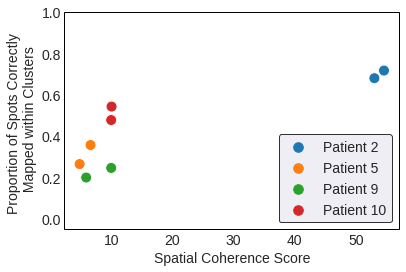

In [15]:
z = pairwise_se0_1.iloc[0].to_numpy()
p = pairwise_se0_1.iloc[1].to_numpy()

labels = 2*["Patient 2"] + 2*["Patient 5"] + 2*["Patient 9"] + 2*["Patient 10"]
palette = sns.color_palette(n_colors= 4)

ax = sns.scatterplot(np.abs(z), p, hue = labels, palette=palette, s = 120)
plt.legend(loc='lower right', frameon=True, edgecolor='black', fontsize= 14, markerscale = 1.6)
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth('1')  
ax.set_xlabel("Spatial Coherence Score", fontsize = 14)
ax.set_ylabel("Proportion of Spots Correctly \n Mapped within Clusters", fontsize = 14)
ax.set_ylim(-0.05, 1)
t = plt.xticks(fontsize= 14)
t = plt.yticks(fontsize= 14)

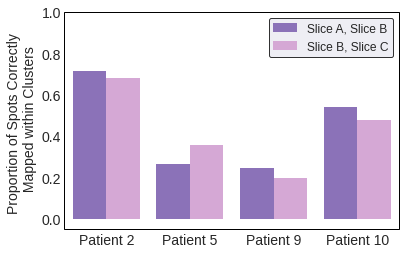

In [16]:
colors = ["#8766c4", "#dda0dd"]
bar_label = 4*['Slice A, Slice B', 'Slice B, Slice C']
labels = 2*['Patient 2'] + 2*['Patient 5'] + 2*['Patient 9'] +2*['Patient 10']
ax2 = sns.barplot(x=labels, y = p, hue=bar_label, palette=sns.color_palette(colors))
ax2.set(ylabel="|Spatial Entropy Z-Score|")
ax2.set_facecolor('white')
ax2.patch.set_edgecolor('black')
ax2.patch.set_linewidth('1')  
ax2.set_ylabel("Proportion of Spots Correctly \n Mapped within Clusters", fontsize = 14)
ax2.set_ylim(-0.05,1)
plt.legend(frameon=True, edgecolor='black', fontsize = 12)

## cSCC Center Alignment Figures

In [17]:
center_p2_path = "../cachedResults/realData/patient2_z_scores"
center_p5_path = "../cachedResults/realData/patient5_z_scores"
center_p9_path = "../cachedResults/realData/patient9_z_scores"
center_p10_path = "../cachedResults/realData/patient10_z_scores"
center_p2 = pd.read_csv(center_p2_path, index_col= 0).to_numpy().flatten()
center_p5 = pd.read_csv(center_p5_path, index_col= 0).to_numpy().flatten()
center_p9 = pd.read_csv(center_p9_path, index_col= 0).to_numpy().flatten()
center_p10 = pd.read_csv(center_p10_path, index_col= 0).to_numpy().flatten()

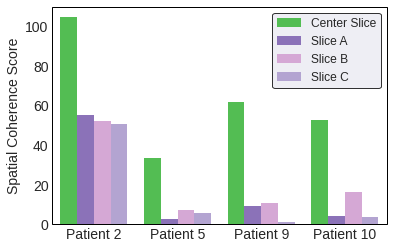

In [18]:
colors = ["#41cf41", "#8766c4", "#dda0dd", "#b19cd9"]
bar_label = 4*['Center Slice', 'Slice A', 'Slice B', 'Slice C']
labels = 4*['Patient 2'] + 4*['Patient 5'] + 4*['Patient 9'] +4*['Patient 10']
zscores = np.abs(np.concatenate((center_p2, center_p5, center_p9, center_p10)))
ax2 = sns.barplot(x=labels, y = zscores, hue=bar_label, palette=sns.color_palette(colors))
ax2.set(ylabel="|Spatial Entropy Z-Score|")
ax2.set_facecolor('white')
ax2.patch.set_edgecolor('black')
ax2.patch.set_linewidth('1')  
ax2.set_ylabel("Spatial Coherence Score", fontsize = 14)
plt.legend(frameon=True, edgecolor='black', fontsize = 12)